In [8]:
library(car)
library(MASS)
library(tseries)
# read CSV
data1<-read.csv("/Users/rachaeltay/Google Drive/NUS/ST3131/Bodyfat.csv", header=TRUE, sep=",")
attach(data1)

In [13]:
#Correlation matrix ryx_i
cor(data1)# Highly correlated with Abdomen

,Density,Bf,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.00000000,-0.98778240,-0.27763721,-0.59406188,0.09788114,-0.4729664,-0.6825987,-0.79895463,-0.60933143,-0.5530910,-0.49504035,-0.2648900,-0.48710872,-0.35164842,-0.3257160
Bf,-0.98778240,1.00000000,0.29145844,0.61241400,-0.08949538,0.4905919,0.7026203,0.81343228,0.62520092,0.5596075,0.50866524,0.2659698,0.49327113,0.36138690,0.3465749
Age,-0.27763721,0.29145844,1.00000000,-0.01274609,-0.17164514,0.1135052,0.1764497,0.23040942,-0.05033212,-0.2000958,0.01751569,-0.1050581,-0.04116212,-0.08505555,0.2135306
Weight,-0.59406188,0.61241400,-0.01274609,1.00000000,0.30827854,0.8307162,0.8941905,0.88799494,0.94088412,0.8686935,0.85316739,0.6136854,0.80041593,0.63030143,0.7297749
Height,0.09788114,-0.08949538,-0.17164514,0.30827854,1.00000000,0.2537099,0.1348918,0.08781291,0.17039426,0.1484356,0.28605321,0.2647437,0.20781557,0.22864922,0.3220653
Neck,-0.47296636,0.49059185,0.11350519,0.83071622,0.25370988,1.0000000,0.7848350,0.75407737,0.73495788,0.6956973,0.67240498,0.4778924,0.73114592,0.62366027,0.7448264
Chest,-0.68259865,0.70262034,0.17644968,0.89419052,0.13489181,0.7848350,1.0000000,0.91582767,0.82941992,0.7298586,0.71949640,0.4829879,0.72790748,0.58017273,0.6601623
Abdomen,-0.79895463,0.81343228,0.23040942,0.88799494,0.08781291,0.7540774,0.9158277,1.00000000,0.87406618,0.7666239,0.73717888,0.4532227,0.68498272,0.50331609,0.6198324
Hip,-0.60933143,0.62520092,-0.05033212,0.94088412,0.17039426,0.7349579,0.8294199,0.87406618,1.00000000,0.8964098,0.82347262,0.5583868,0.73927252,0.54501412,0.6300895
Thigh,-0.55309098,0.55960753,-0.20009576,0.86869354,0.14843561,0.6956973,0.7298586,0.76662393,0.89640979,1.0000000,0.79917030,0.5397971,0.76147745,0.56684218,0.5586848


In [14]:
#Doing the stepwise method
nullmodel <- lm(Bf~1, data=data1)
fullmodel <- lm(Bf~., data=data1)

#Stepwise function
model<-step(nullmodel,data=data1,scope = list(upper=fullmodel,lower=nullmodel),direction="both", k=2, test="F")
anova(model)
summary(model)

Start:  AIC=1071.75
Bf ~ 1

          Df Sum of Sq     RSS     AIC    F value    Pr(>F)    
+ Density  1   17152.1   426.9  136.85 10044.0279 < 2.2e-16 ***
+ Abdomen  1   11631.5  5947.5  800.65   488.9281 < 2.2e-16 ***
+ Chest    1    8678.3  8900.7  902.24   243.7543 < 2.2e-16 ***
+ Hip      1    6871.2 10707.8  948.82   160.4256 < 2.2e-16 ***
+ Weight   1    6593.0 10986.0  955.29   150.0326 < 2.2e-16 ***
+ Thigh    1    5505.0 12073.9  979.08   113.9861 < 2.2e-16 ***
+ Knee     1    4548.4 13030.6  998.30    87.2637 < 2.2e-16 ***
+ Biceps   1    4277.3 13301.7 1003.49    80.3891 < 2.2e-16 ***
+ Neck     1    4230.9 13348.1 1004.36    79.2421 < 2.2e-16 ***
+ Forearm  1    2295.8 15283.2 1038.48    37.5548 3.437e-09 ***
+ Wrist    1    2111.5 15467.5 1041.50    34.1278 1.600e-08 ***
+ Age      1    1493.3 16085.7 1051.38    23.2085 2.522e-06 ***
+ Ankle    1    1243.5 16335.5 1055.26    19.0312 1.882e-05 ***
+ Height   1     140.8 17438.2 1071.72     2.0185    0.1566    
<none>      

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Density,1,17152.067795,17152.067795,10821.170152,1.415460e-206
Abdomen,1,28.556671,28.556671,18.016288,3.097362e-05
Age,1,5.273615,5.273615,3.327103,6.935022e-02
Residuals,248,393.091759,1.585047,NA,NA



Call:
lm(formula = Bf ~ Density + Abdomen + Age, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3394 -0.3463 -0.0945  0.2131 15.6006 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.453e+02  8.393e+00  53.060  < 2e-16 ***
Density     -4.088e+02  7.034e+00 -58.116  < 2e-16 ***
Abdomen      5.168e-02  1.226e-02   4.217 3.47e-05 ***
Age          1.197e-02  6.565e-03   1.824   0.0694 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.259 on 248 degrees of freedom
Multiple R-squared:  0.9776,	Adjusted R-squared:  0.9774 
F-statistic:  3614 on 3 and 248 DF,  p-value: < 2.2e-16


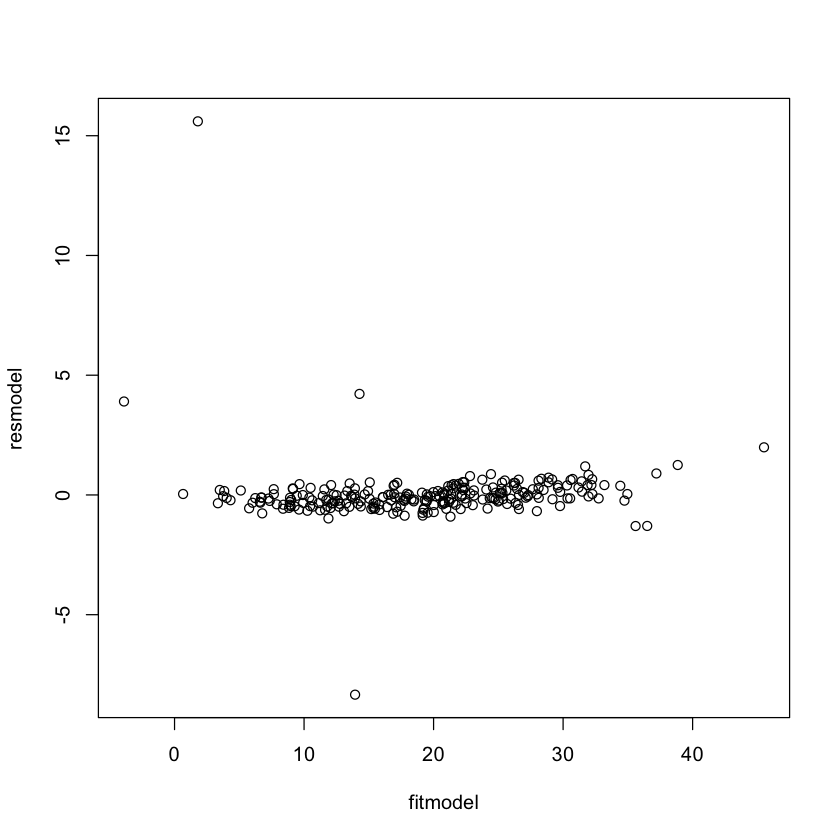

In [15]:
# Plotting residuals for the model, having Predictors : Abdomen + Weight + Wrist + Forearm + Neck + Age + Thigh + Hip
fitmodel<-model$fitted.values
resmodel<-model$res
plot(resmodel~fitmodel)

In [19]:
#Analysis of obtained model

# Remove outliers
influObs <- influence.measures(model)
removeRows <- data.matrix(which(apply(influObs$is.inf, 1, any)))
for (i in 1:NROW(removeRows)){
  data1 <- data1[-removeRows[i]+i-1,]
}

#Reduced model after partial F-tests
redmodel<-lm(Bf~Abdomen + Weight + Wrist + Forearm ) 
summary(redmodel)
anova(redmodel)


Call:
lm(formula = Bf ~ Abdomen + Weight + Wrist + Forearm)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5626  -3.1235  -0.1461   3.1313   9.0867 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -34.85407    7.24500  -4.811 2.62e-06 ***
Abdomen       0.99575    0.05607  17.760  < 2e-16 ***
Weight       -0.13563    0.02475  -5.480 1.05e-07 ***
Wrist        -1.50556    0.44267  -3.401 0.000783 ***
Forearm       0.47293    0.18166   2.603 0.009790 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.343 on 247 degrees of freedom
Multiple R-squared:  0.735,	Adjusted R-squared:  0.7307 
F-statistic: 171.3 on 4 and 247 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Abdomen,1,11631.5268,11631.52681,616.754339,4.280299e-69
Weight,1,1004.2178,1004.21778,53.248011,4.001931e-12
Wrist,1,157.1910,157.19103,8.334955,4.233424e-03
Forearm,1,127.8185,127.81846,6.777493,9.790163e-03
Residuals,247,4658.2358,18.85925,NA,NA


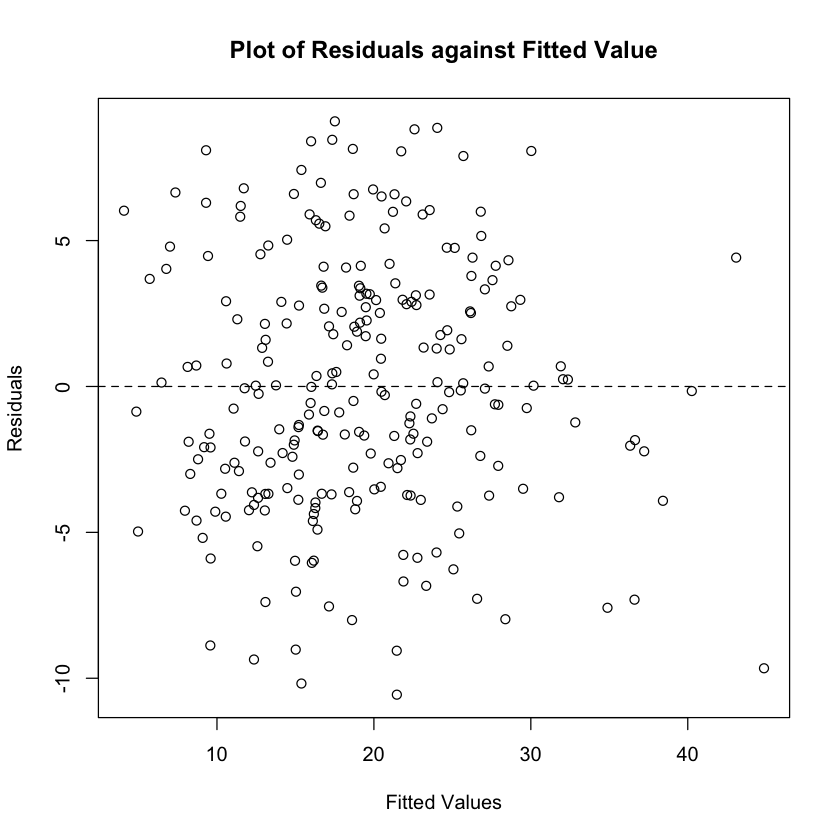

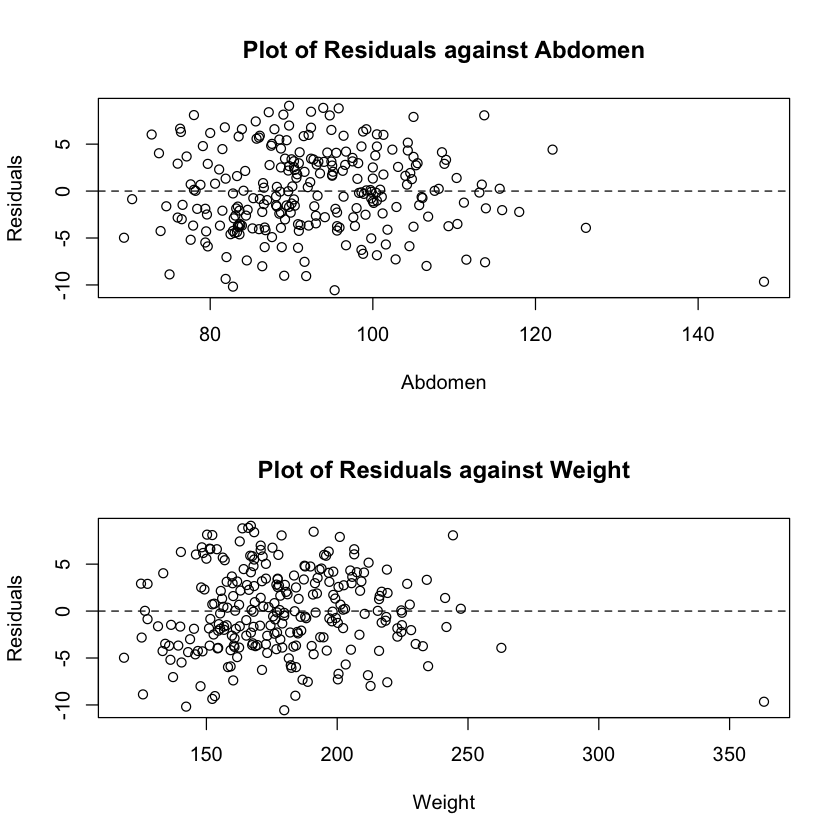

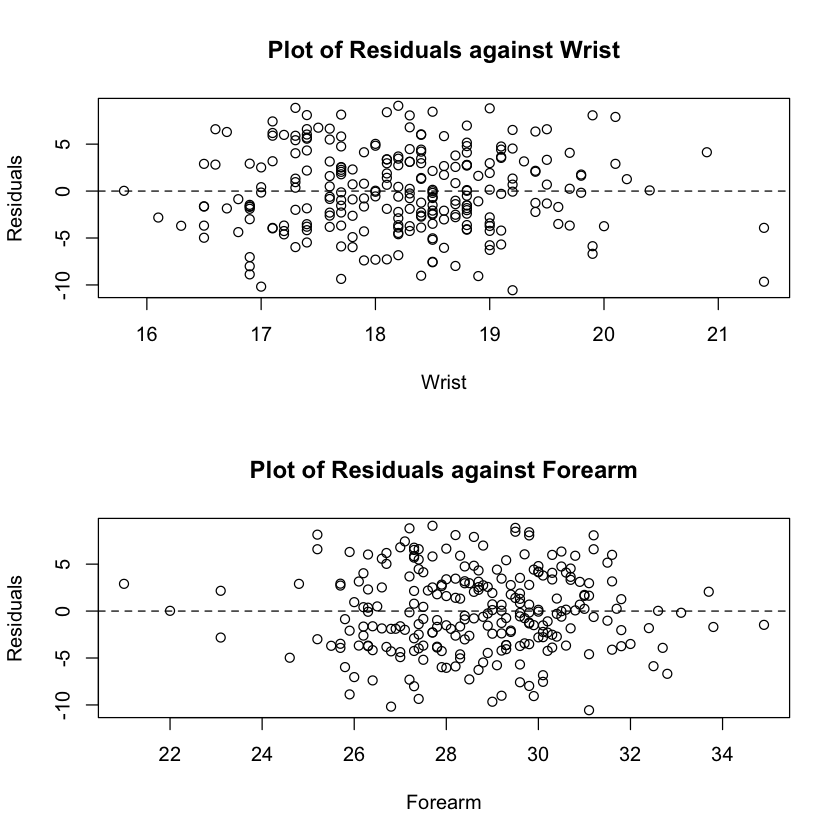

In [27]:
#Plotting graph for reduced model
redres<-redmodel$res
redfit<-redmodel$fitted.values
par(mfrow=c(1,1))
plot(redfit, redres, xlab="Fitted Values", ylab="Residuals", main="Plot of Residuals against Fitted Value")
abline(h=0, lty=2)
# plot Abdomen, Weight, Wrist, Forearm against residual
par(mfrow=c(2,1))
plot(Abdomen, redres, xlab="Abdomen", ylab="Residuals", main="Plot of Residuals against Abdomen")
abline(h=0, lty=2)
plot(Weight, redres, xlab="Weight", ylab="Residuals", main="Plot of Residuals against Weight")
abline(h=0, lty=2)
plot(Wrist, redres, xlab="Wrist", ylab="Residuals", main="Plot of Residuals against Wrist")
abline(h=0, lty=2)
plot(Forearm, redres, xlab="Forearm", ylab="Residuals", main="Plot of Residuals against Forearm")
abline(h=0, lty=2)
par(mfrow=c(1,1))

In [29]:
#Testing independece for reduced model
runs.test(factor(sign(redres)))
durbinWatsonTest(redmodel)


	Runs Test

data:  factor(sign(redres))
Standard Normal = 0.39515, p-value = 0.6927
alternative hypothesis: two.sided


 lag Autocorrelation D-W Statistic p-value
   1      0.09743067      1.798071    0.08
 Alternative hypothesis: rho != 0


	One-sample Kolmogorov-Smirnov test

data:  redres
D = 0.042088, p-value = 0.7634
alternative hypothesis: two-sided


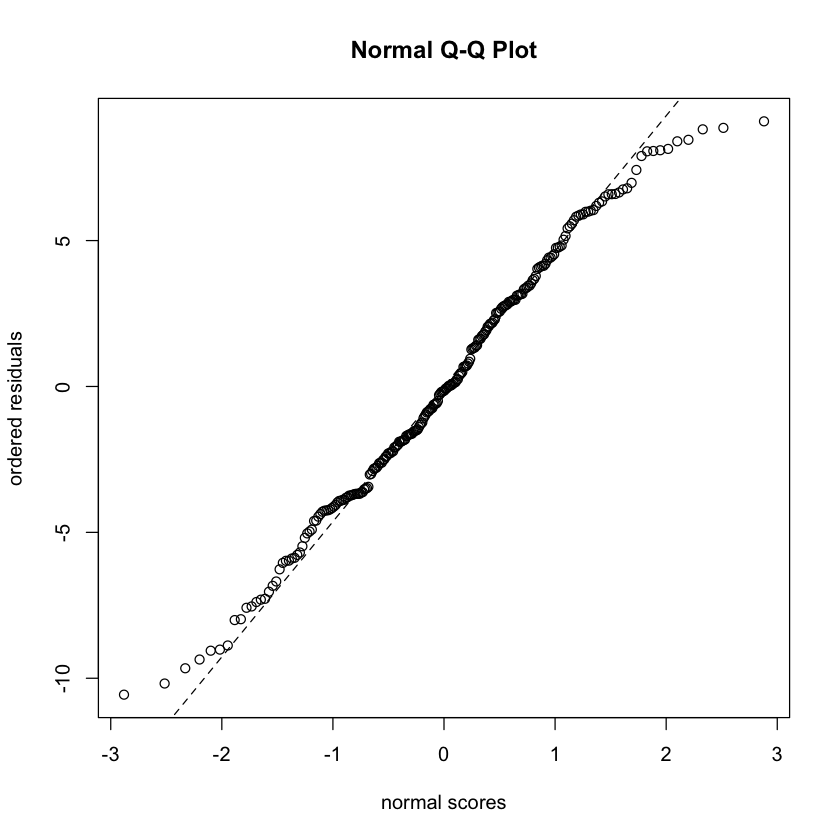

In [31]:
#Testing normality for reduced model
ks.test(redres,"pnorm",mean(redres),sd(redres))
qqnorm(redres,xlab="normal scores", ylab="ordered residuals")
qqline(redres,lty=2)

In [48]:
# whether should include higher power
Abdomen2 =  Abdomen^2;
Weight2 = Weight^2;
Wrist2 = Wrist^2;
Forearm2 = Forearm^2;

power2model<-lm(Bf~Abdomen + Weight + Wrist + Forearm + Abdomen2 + Weight2 + Wrist2 + Forearm2) 
summary(power2model)
anova(power2model,redmodel)


Call:
lm(formula = Bf ~ Abdomen + Weight + Wrist + Forearm + Abdomen2 + 
    Weight2 + Wrist2 + Forearm2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2567  -2.9851  -0.1499   3.0473   9.0197 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.986e+01  8.589e+01   0.231   0.8174  
Abdomen      1.012e+00  5.395e-01   1.876   0.0618 .
Weight       1.066e-01  1.239e-01   0.860   0.3906  
Wrist       -1.098e+01  1.061e+01  -1.035   0.3018  
Forearm      1.328e+00  2.564e+00   0.518   0.6048  
Abdomen2    -2.652e-04  2.822e-03  -0.094   0.9252  
Weight2     -5.569e-04  3.118e-04  -1.786   0.0753 .
Wrist2       2.550e-01  2.889e-01   0.883   0.3782  
Forearm2    -1.900e-02  4.512e-02  -0.421   0.6741  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.266 on 243 degrees of freedom
Multiple R-squared:  0.7484,	Adjusted R-squared:  0.7401 
F-statistic: 90.34 on 8 and 243 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
243,4423.191,NA,NA,NA,NA
247,4658.236,-4,-235.0452,3.228211,0.01321608


In [47]:
# with only weight2
power2model2<-lm(Bf~Abdomen + Weight + Wrist + Forearm + Weight2) 
summary(power2model2)
anova(power2model2,redmodel)


Call:
lm(formula = Bf ~ Abdomen + Weight + Wrist + Forearm + Weight2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2692  -3.0165  -0.1983   3.0265   9.1398 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.594e+01  7.761e+00  -5.919 1.08e-08 ***
Abdomen      9.698e-01  5.533e-02  17.526  < 2e-16 ***
Weight       7.930e-02  6.603e-02   1.201 0.230924    
Wrist       -1.622e+00  4.342e-01  -3.735 0.000233 ***
Forearm      2.410e-01  1.896e-01   1.271 0.204950    
Weight2     -4.929e-04  1.409e-04  -3.499 0.000555 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.247 on 246 degrees of freedom
Multiple R-squared:  0.7476,	Adjusted R-squared:  0.7424 
F-statistic: 145.7 on 5 and 246 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
246,4437.441,NA,NA,NA,NA
247,4658.236,-1,-220.7952,12.2403,0.0005549388


In [51]:
# without weight
power2model3<-lm(Bf~Abdomen + Wrist + Forearm + Weight2) 
summary(power2model3)
anova(power2model3,power2model2)
# should not remove


Call:
lm(formula = Bf ~ Abdomen + Wrist + Forearm + Weight2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5409  -2.9784  -0.1249   3.0645   8.9338 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.436e+01  7.656e+00  -5.794 2.09e-08 ***
Abdomen      9.975e-01  5.032e-02  19.822  < 2e-16 ***
Wrist       -1.512e+00  4.248e-01  -3.558 0.000447 ***
Forearm      3.408e-01  1.706e-01   1.997 0.046885 *  
Weight2     -3.355e-04  5.169e-05  -6.490 4.65e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.251 on 247 degrees of freedom
Multiple R-squared:  0.7461,	Adjusted R-squared:  0.742 
F-statistic: 181.4 on 4 and 247 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
247,4463.457,NA,NA,NA,NA
246,4437.441,1,26.01662,1.442293,0.2309237


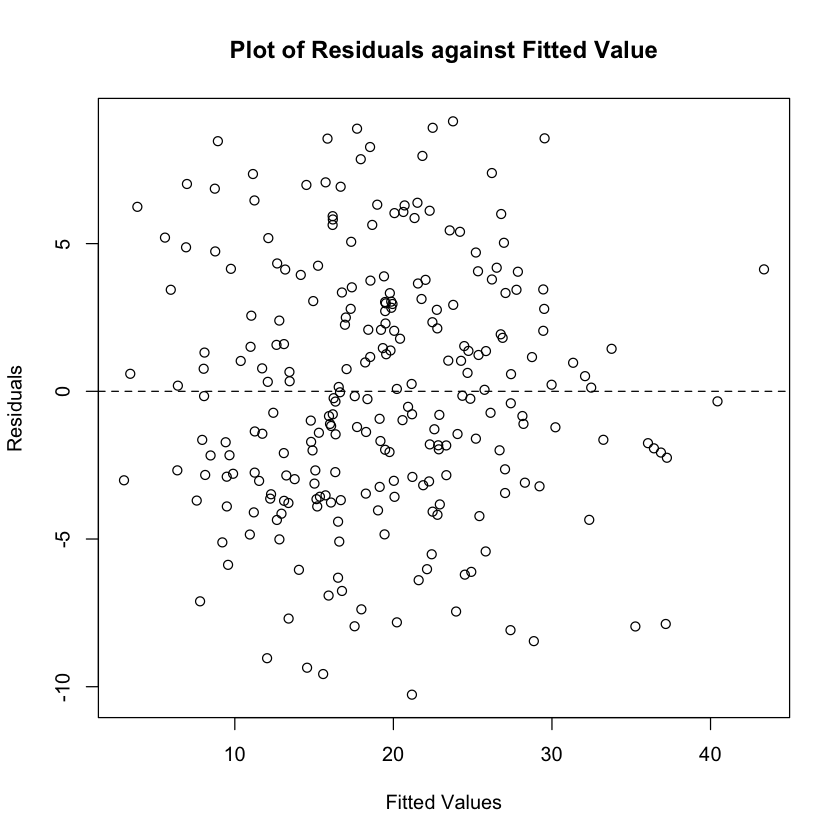

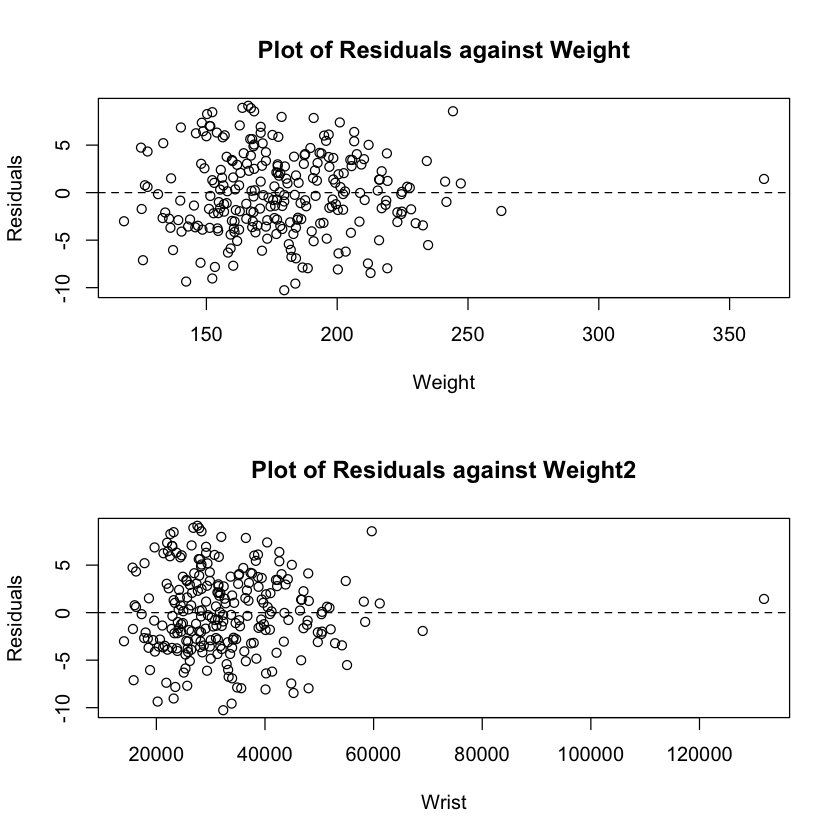

In [52]:
#Plotting graph for reduced model with weight2
redres2<-power2model2$res
redfit2<-power2model2$fitted.values
par(mfrow=c(1,1))
plot(redfit2, redres2, xlab="Fitted Values", ylab="Residuals", main="Plot of Residuals against Fitted Value")
abline(h=0, lty=2)
# plot Abdomen, Weight, Wrist, Forearm against residual
par(mfrow=c(2,1))
plot(Weight, redres2, xlab="Weight", ylab="Residuals", main="Plot of Residuals against Weight")
abline(h=0, lty=2)
plot(Weight2, redres2, xlab="Wrist", ylab="Residuals", main="Plot of Residuals against Weight2")
abline(h=0, lty=2)
par(mfrow=c(1,1))

In [54]:
# whether should include interaction terms
AbdomenWeight =  Abdomen*Weight;
WeightWrist = Weight*Wrist;
WristForearm = Wrist*Forearm;
AbdomenForearm =  Abdomen*Forearm;

intmodel<-lm(Bf~Abdomen + Weight + Wrist + Forearm + Weight2 + AbdomenWeight + WeightWrist + WristForearm + AbdomenForearm) 
summary(intmodel)
anova(intmodel,power2model2)
# won't include any cos all bad


Call:
lm(formula = Bf ~ Abdomen + Weight + Wrist + Forearm + Weight2 + 
    AbdomenWeight + WeightWrist + WristForearm + AbdomenForearm)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7584 -3.0301 -0.3673  3.2070  9.0406 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)
(Intercept)    -1.123e+02  7.014e+01  -1.601    0.111
Abdomen         5.398e-01  5.923e-01   0.911    0.363
Weight         -2.379e-01  2.464e-01  -0.965    0.335
Wrist           3.547e+00  5.761e+00   0.616    0.539
Forearm         4.949e+00  3.023e+00   1.637    0.103
Weight2        -8.156e-04  7.504e-04  -1.087    0.278
AbdomenWeight  -3.330e-04  2.458e-03  -0.135    0.892
WeightWrist     2.522e-02  1.849e-02   1.364    0.174
WristForearm   -3.412e-01  2.470e-01  -1.382    0.168
AbdomenForearm  1.720e-02  2.401e-02   0.717    0.474

Residual standard error: 4.257 on 242 degrees of freedom
Multiple R-squared:  0.7505,	Adjusted R-squared:  0.7412 
F-statistic: 80.88 on 9 and 242 DF,  p-valu

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
242,4385.891,NA,NA,NA,NA
246,4437.441,-4,-51.54929,0.7110828,0.5850517
